In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KernelDensity

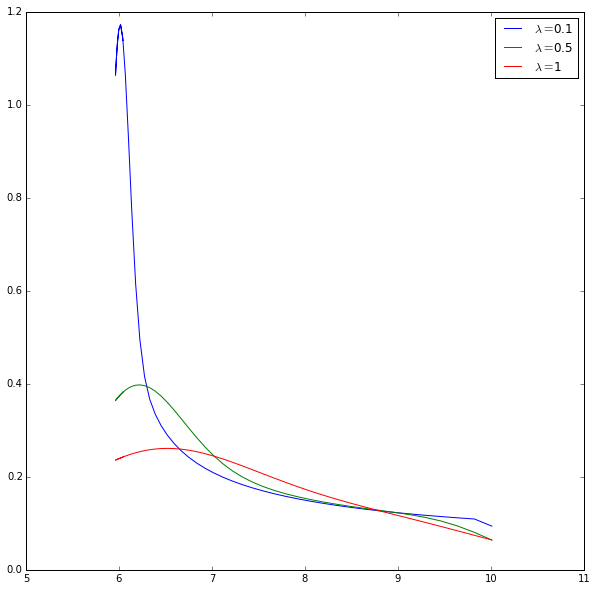

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
data = pd.read_csv('CoCo.csv')
CoCo =  data['yield'].as_matrix()
CoCo = CoCo[:, np.newaxis]
bw = [0.1,0.5,1]
for l in bw:
    kde = KernelDensity(kernel='gaussian', bandwidth=l).fit(CoCo)
    ax.plot(CoCo,np.exp(kde.score_samples(CoCo)),label='$\lambda=$' + str(l))
    
ax.legend()


In [31]:
randomnbrs = 1000
prob = []
for k in bw:
    CoCo_random = kde.sample(randomnbrs)
    prob.append(np.sum((CoCo_random<8)*(CoCo_random>7))/randomnbrs)
print(prob)

[0.23100000000000001, 0.189, 0.24399999999999999]


In [34]:
from sklearn.grid_search import GridSearchCV
params = {'bandwidth': np.arange(0.05,5,0.1)}
grid = GridSearchCV(KernelDensity(),params)
grid.fit(CoCo)
print("best bandwidth: {k:0.2f}".format(k=grid.best_estimator_.bandwidth))

best bandwidth: 1.75
